In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '5'

In [3]:
from solver.envs.softbody import CutEnv, RopeEnv


env = RopeEnv(max_steps=41)

LOADING....
Loaded with 0.0008039474487304688 secs.
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
/home/zhiao/zhiao/Concept/solver/envs/softbody/.cache
using device None
GPU 0/1 memory: free=10.763, total=10.917
init renderer
GPU 0/1 memory: free=10.702, total=10.917
GPU 0/1 memory: free=10.202, total=10.917


SDF SAMPLING: 0: : 5002it [00:01, 2967.44it/s]                           


In [17]:
images = []


trajs = torch.load('../exp/rope_gd/softmax/traj16.th')
# for j in range(10):
#      env.env.set_state(trajs[j][-10])
#      images.append([env.env.render('rgb_array', spp=1, render_plt=False, ray_tracing=True)])
# plt.imshow(fuse(images, 0, 'concat'))
# plt.show()

images = []
for j in range(10):
    i = trajs[j]
    env.env.set_state(trajs[j][-5])
    images.append([env.env.render('rgb_array', spp=200, render_plt=False, ray_tracing=True)])


from solver.envs.softbody.plot.utils import fuse_traj_images, fuse
import matplotlib.pyplot as plt


import numpy as np
ours = np.concatenate([i[0][64:512-64, 64:512-64] for i in images], axis=1)
import cv2
import cv2
cv2.imwrite('rope_ours.png', ours)

ours = images

KeyboardInterrupt: 

In [10]:
# trajs = torch.load('../exp/rope_gd/gd/traj3.th')
from solver.envs.softbody.train_rope import *
import torch
rpg = torch.load('../exp/rope_gd/gd/model')
actor = rpg.actor


tmp = []

for k in range(10):
    z = totensor([0], device='cuda:0', dtype=torch.long)
    obs = env.reset()
    prior_z = rpg.prior_actor.pi_z(obs, None, timestep=0).sample()[0] 

    p_z = actor.pi_z(obs, prior_z, timestep=0)
    for t in range(env.low_steps):
        p_a = actor.pi_a(obs, z, timestep=t)

        a, log_p_a = p_a.rsample()
        obs, r, _, _ = env.step(a)
        if t == env.low_steps -1 :
            tmp.append([env.env.render(mode='rgb_array', render_plt=False, ray_tracing=True, spp=200)])
            print(tmp[-1][0].shape)
            break
# print(len(trajs))

# images = []
# for j in range(10):
#     i = trajs[j]
#     env.env.set_state(trajs[j][-5])
#     images.append([env.env.render('rgb_array', spp=1, render_plt=False, ray_tracing=True)])



(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


TypeError: list indices must be integers or slices, not tuple

In [16]:


# from solver.envs.softbody.plot.utils import fuse_traj_images, fuse
# import matplotlib.pyplot as plt

GD = np.concatenate([i[0][64:512-64, 64:512-64] for i in tmp], axis=1)
import cv2
import cv2
cv2.imwrite('rope_gd.png', GD[:,:,::-1])

True

In [6]:
print(tmp[0][0].shape)
GD = np.mean([i[0] for i in tmp], axis=0).clip(0, 255).astype(np.uint8)
print(GD.shape)

(512, 512, 3)
(512, 512, 3)


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


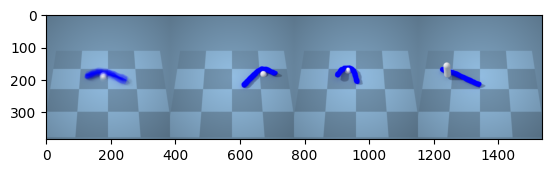

In [9]:

all = []
for i in [GD] + [j[0] for j in images]:
    print(i.shape)
    all.append(i[64:128+256 + 64, 64:128+256 + 64])
plt.imshow(np.concatenate(all, axis=1))



import cv2
for idx, i in enumerate(all):
    cv2.imwrite(f'rope{idx}.png', i[...,::-1])